In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,NaN,yes,NaN,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    1
smoker      0
region      1
charges     0
dtype: int64

In [5]:
data = data.fillna(method='bfill')

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.095665,13270.422265
std,14.049960,6.098187,1.205123,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


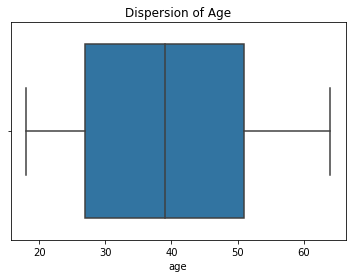

In [8]:
# No outlier in age column.
ax = sns.boxplot(data['age'])
ax.set_title('Dispersion of Age')
plt.show(ax)

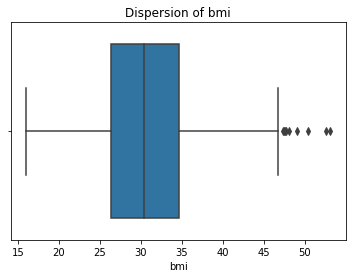

In [9]:
#To ensure there are no outliers for bmi by box plot. But, there are few bmi values above 47 
#which can be considered as outliers'''
ax = sns.boxplot(data['bmi'])
ax.set_title("Dispersion of bmi")
plt.show(ax)

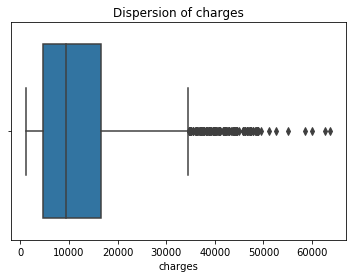

In [10]:
ax = sns.boxplot(data['charges'])
ax.set_title("Dispersion of charges")
plt.show(ax)

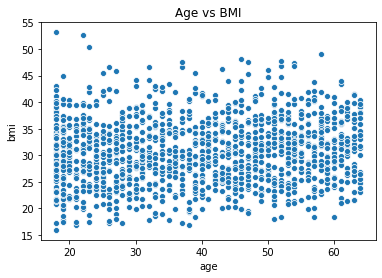

In [11]:
#'''The scatter plot is not representing, when Age is increasing bmi is also increasing. 
#Few data points of bmi is high at younger age compare to other data points. Those data points can be consider as outliers'''
ax = sns.scatterplot(x = 'age', y = 'bmi', data = data)
ax.set_title('Age vs BMI')
plt.show(ax)

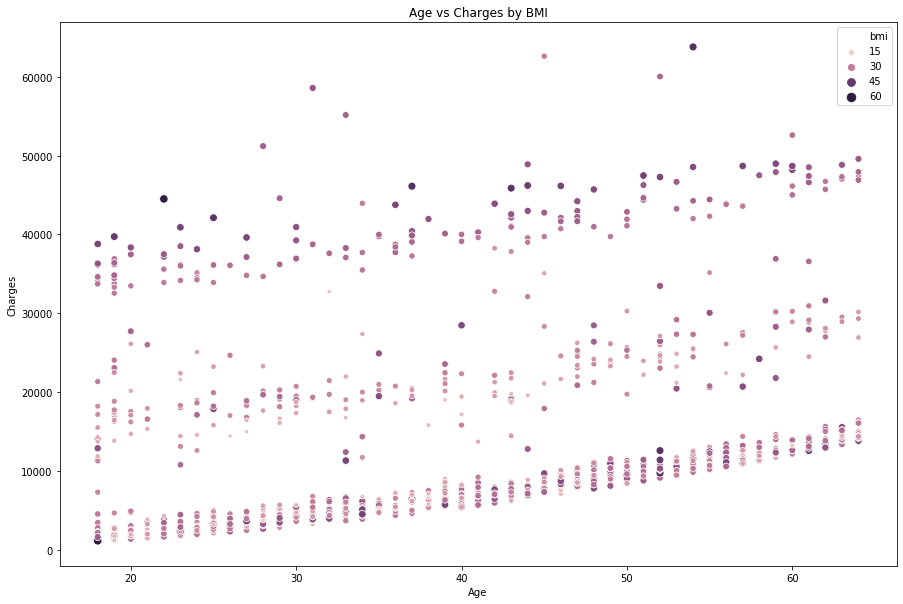

In [12]:
##Scatter plot clearly states that, when age is increasing expenses also increasing but has three different groups of charges irrespective of bmi. Hence, BMI is not influencing the expenses with Age.

plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age',y='charges',hue = 'bmi',size = 'bmi', data=data)
ax = ax.set_title("Age vs Charges by BMI")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show(ax)

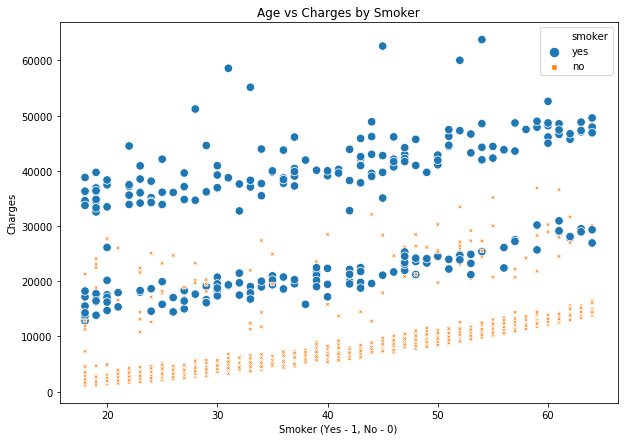

In [13]:
#Both Age and smoker are highly influncing the expenses. Smoker yes
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='age',y='charges', hue=data['smoker'],style = data['smoker'],size = data['smoker'], data=data)
ax.set_title("Age vs Charges by Smoker")
plt.xlabel("Smoker (Yes - 1, No - 0)")
plt.ylabel("Charges")
plt.show(ax)

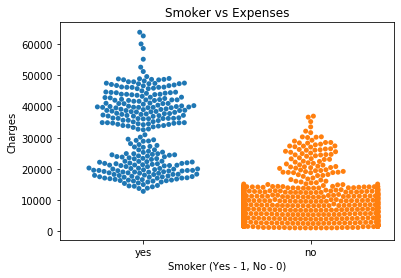

In [14]:
#Swarm plot shows how smoker feature is influencing the expeneses compare with smoker and non-smoker
ax = sns.swarmplot(x='smoker',y='charges',data=data)
ax.set_title("Smoker vs Expenses")
plt.xlabel("Smoker (Yes - 1, No - 0)")
plt.ylabel("Charges")
plt.show(ax)

In [15]:
#drop the unwanted feature
data = data.drop('sex', axis=1)
data = data.drop('region', axis=1)
data = data.drop('children', axis=1)
data.head(1)

,age,bmi,smoker,charges
0,19,27.9,yes,16884.924


In [16]:
#Split the data in to Dependent and independent varaiable

X = data.iloc[:,0:3]
y = data.iloc[:,-1]

In [17]:
X.head()

,age,bmi,smoker
0,19,27.900,yes
1,18,33.770,no
2,28,33.000,no
3,33,22.705,no
4,32,28.880,no


In [18]:
#Convert categorical values in to numeric

Smokers = pd.get_dummies(data['smoker'])

In [19]:
X=X.drop('smoker', axis=1)

In [20]:
X = pd.concat([X, Smokers], axis=1)

In [21]:
X.head()

,age,bmi,no,yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0


In [22]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [23]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=101)

In [25]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mul_reg = LinearRegression()

In [26]:
mul_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = mul_reg.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
Score = r2_score(y_test, y_pred)

In [29]:
print(Score) 

0.7554384498048252


In [39]:
#Train and predict the y_train:

print("intercept:",mul_reg.intercept_, "coeff:", mul_reg.coef_)
charges_df = pd.DataFrame(list(zip(y_train, mul_reg.predict(X_test))), columns = ['Actual charges','Predicted Charges'])
charges_df.head()

intercept: -95.28880034219583 coeff: [   245.82003585    346.58386861 -11752.93739878  11752.93739878]


,Actual charges,Predicted Charges
0,11286.53870,10333.867495
1,8017.06115,3044.591176
2,6746.74250,10250.081032
3,8252.28430,27803.621169
4,11305.93455,5116.301864
